Author: Sudipto Ghosh (Roll No. 51) - University of Delhi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## Using a Decision Tree Classifier

### Holdout Method

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(
  X, y, test_size=0.25, random_state=123
)

dt = DecisionTreeClassifier()
print(dt)

dt.fit(X_train, Y_train)
result = dt.score(X_test, Y_test)

print(f'Accuracy: {result * 100:.2f}%')

DecisionTreeClassifier()
Accuracy: 71.88%


### $k$-fold Cross Validation ($k=10$)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10)

dt_kfold = DecisionTreeClassifier()
print(dt_kfold)

results_kfold = cross_val_score(dt_kfold, X, y, cv=kfold)

print(f'Accuracy: {results_kfold.mean() * 100:.2f}%')

DecisionTreeClassifier()
Accuracy: 70.18%


### Stratified $k$-fold Cross Validation ($k=3$)

In [ ]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)

dt_skfold = DecisionTreeClassifier()
print(dt_skfold)

results_skfold = cross_val_score(dt_skfold, X, y, cv=skfold)

print(f'Accuracy: {results_skfold.mean() * 100:.2f}%')

DecisionTreeClassifier()
Accuracy: 67.97%


### Leave One Out Cross Validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()

dt_loocv = DecisionTreeClassifier()
print(dt_loocv)

results_loocv = cross_val_score(dt_loocv, X, y, cv=loocv)

print(f'Accuracy: {results_loocv.mean() * 100:.2f}%')

DecisionTreeClassifier()
Accuracy: 70.31%


### Random Subsampling

In [ ]:
from sklearn.model_selection import ShuffleSplit

kfold_ransubsam = ShuffleSplit(n_splits=10, test_size=0.25, random_state=123)

dt_shufflecv = DecisionTreeClassifier()
print(dt_shufflecv)

results_ransubsam = cross_val_score(dt_shufflecv, X, y, cv=kfold_ransubsam)

print(f'Accuracy: {results_ransubsam.mean() * 100:.2f}% ({results_ransubsam.std():.2f}%)')

DecisionTreeClassifier()
Accuracy: 70.05% (0.03%)


### Comparison

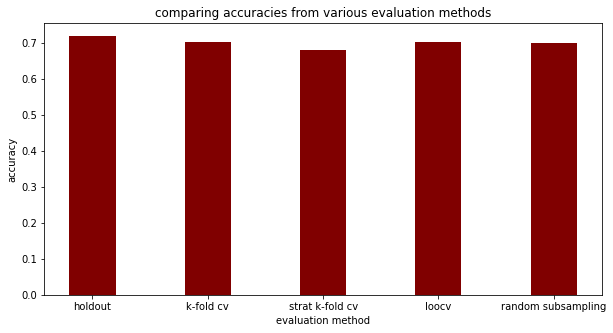

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.bar(['holdout', 'k-fold cv', 'strat k-fold cv', 'loocv', 'random subsampling'],
        [result, results_kfold.mean(), results_skfold.mean(), results_loocv.mean(), results_ransubsam.mean()],
        color ='maroon',
        width = 0.4)

plt.xlabel("evaluation method")
plt.ylabel("accuracy")
plt.title("comparing accuracies from various evaluation methods")
plt.show()

## Using a Support Vector Classifier

### Holdout Method

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', probability=True)
print(svc)

svc.fit(X_train, Y_train)
result = svc.score(X_test, Y_test)

print(f'Accuracy: {result * 100:.2f}%')

SVC(kernel='linear', probability=True)
Accuracy: 81.25%


### $k$-fold Cross Validation ($k=10$)

In [ ]:
kfold = KFold(n_splits=10)

svc_kfold = SVC(kernel='linear')
print(svc_kfold)

results_kfold = cross_val_score(svc_kfold, X, y, cv=kfold)

print(f'Accuracy: {results_kfold.mean() * 100:.2f}%')

SVC(kernel='linear')
Accuracy: 77.34%


### Stratified $k$-fold Cross Validation ($k=3$)

In [ ]:
skfold = StratifiedKFold(n_splits=3)

svc_skfold = SVC(kernel='linear')
print(svc_skfold)

results_skfold = cross_val_score(svc_skfold, X, y, cv=skfold)

print(f'Accuracy: {results_skfold.mean() * 100:.2f}%')

SVC(kernel='linear')
Accuracy: 75.91%


### Leave One Out Cross Validation

In [ ]:
loocv = LeaveOneOut()

svc_loocv = SVC(kernel='linear')
print(svc_loocv)

results_loocv = cross_val_score(svc_loocv, X, y, cv=loocv)

print(f'Accuracy: {results_loocv.mean() * 100:.2f}%')

SVC(kernel='linear')
Accuracy: 77.08%


### Random Subsampling

In [ ]:
kfold_ransubsam = ShuffleSplit(n_splits=10, test_size=0.25, random_state=123)

svc_shufflecv = SVC(kernel='linear')
print(svc_shufflecv)

results_randsubsam = cross_val_score(svc_shufflecv, X, y, cv=kfold_ransubsam)

print(f'Accuracy: {results_randsubsam.mean() * 100:.2f}% ({results_randsubsam.std():.2f}%)')

SVC(kernel='linear')
Accuracy: 77.92% (0.02%)


### Comparison

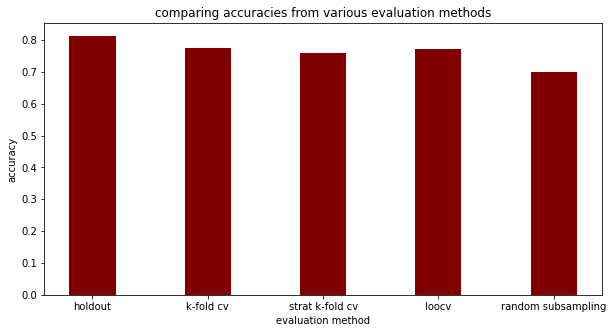

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.bar(['holdout', 'k-fold cv', 'strat k-fold cv', 'loocv', 'random subsampling'],
        [result, results_kfold.mean(), results_skfold.mean(), results_loocv.mean(), results_ransubsam.mean()],
        color ='maroon',
        width = 0.4)

plt.xlabel("evaluation method")
plt.ylabel("accuracy")
plt.title("comparing accuracies from various evaluation methods")
plt.show()

## Using a NB Classifier

### Holdout Method

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
print(nb)

nb.fit(X_train, Y_train)
result = nb.score(X_test, Y_test)

print(f'Accuracy: {result * 100:.2f}%')

GaussianNB()
Accuracy: 76.56%


### $k$-fold Cross Validation ($k$ = 10)

In [ ]:
kfold = KFold(n_splits=10)

nb_kfold = GaussianNB()
print(nb_kfold)

results_kfold = cross_val_score(nb_kfold, X, y, cv=kfold)

print(f'Accuracy: {results_kfold.mean() * 100:.2f}%')

GaussianNB()
Accuracy: 75.52%


### Stratified $k$-fold Cross Validation ($k=3$)

In [ ]:
skfold = StratifiedKFold(n_splits=3)

nb_skfold = GaussianNB()
print(nb_skfold)

results_skfold = cross_val_score(nb_skfold, X, y, cv=skfold)

print(f'Accuracy: {results_skfold.mean() * 100:.2f}%')

GaussianNB()
Accuracy: 74.22%


### Leave One Out Cross Validation

In [ ]:
loocv = LeaveOneOut()

nb_loocv = GaussianNB()
print(nb_loocv)

results_loocv = cross_val_score(nb_loocv, X, y, cv=loocv)

print(f'Accuracy: {results_loocv.mean() * 100:.2f}%')

GaussianNB()
Accuracy: 75.39%


### Random Subsampling

In [ ]:
kfold_ransubsam = ShuffleSplit(n_splits=10, test_size=0.25, random_state=123)

nb_shufflecv = GaussianNB()
print(nb_shufflecv)

results_randsubsam = cross_val_score(nb_shufflecv, X, y, cv=kfold_ransubsam)

print(f'Accuracy: {results_randsubsam.mean() * 100:.2f}% ({results_randsubsam.std():.2f}%)')

GaussianNB()
Accuracy: 75.89% (0.02%)


### Comparison

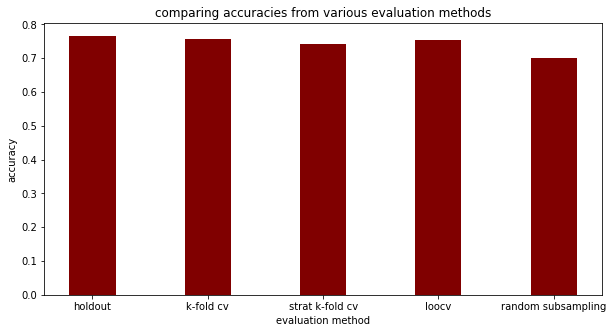

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.bar(['holdout', 'k-fold cv', 'strat k-fold cv', 'loocv', 'random subsampling'],
        [result, results_kfold.mean(), results_skfold.mean(), results_loocv.mean(), results_ransubsam.mean()],
        color ='maroon',
        width = 0.4)

plt.xlabel("evaluation method")
plt.ylabel("accuracy")
plt.title("comparing accuracies from various evaluation methods")
plt.show()

## Using an Ensemble Classifier

### Holdout Method

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('dt',dt),('svm',svc),('nb',nb)], voting='soft')
print(vc)

vc.fit(X_train, Y_train)
result = vc.score(X_test, Y_test)

print(f'Accuracy: {result * 100:.2f}%')

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')
Accuracy: 78.65%


### $k$-fold Cross Validation ($k$ = 10)

In [ ]:
kfold = KFold(n_splits=10)

vc_kfold = VotingClassifier(estimators=[('dt',dt),('svm',svc),('nb',nb)], voting='soft')
print(vc_kfold)

results_kfold = cross_val_score(vc_kfold, X, y, cv=kfold)

print(f'Accuracy: {results_kfold.mean() * 100:.2f}%')

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')
Accuracy: 76.56%


### Stratified $k$-fold Cross Validation ($k$ = 3)

In [ ]:
skfold = StratifiedKFold(n_splits=3)

vc_skfold = VotingClassifier(estimators=[('dt',dt),('svm',svc),('nb',nb)], voting='soft')
print(vc_skfold)

results_skfold = cross_val_score(vc_skfold, X, y, cv=skfold)

print(f'Accuracy: {results_skfold.mean() * 100:.2f}%')

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')
Accuracy: 75.00%


### Leave One Out Cross Validation

In [ ]:
loocv = LeaveOneOut()

vc_loocv = VotingClassifier(estimators=[('dt',dt),('svm',svc),('nb',nb)], voting='soft')
print(vc_loocv)

results_loocv = cross_val_score(vc_loocv, X, y, cv=loocv)

print(f'Accuracy: {results_loocv.mean() * 100:.2f}%')

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')
Accuracy: 76.04%


### Random Subsampling

In [ ]:
kfold_ransubsam = ShuffleSplit(n_splits=10, test_size=0.25, random_state=123)

vc_shufflecv = VotingClassifier(estimators=[('dt',dt),('svm',svc),('nb',nb)], voting='soft')
print(vc_shufflecv)

results_randsubsam = cross_val_score(vc_shufflecv, X, y, cv=kfold_ransubsam)

print(f'Accuracy: {results_randsubsam.mean() * 100:.2f}% ({results_randsubsam.std():.2f}%)')

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('nb', GaussianNB())],
                 voting='soft')
Accuracy: 76.61% (0.02%)


### Comparison

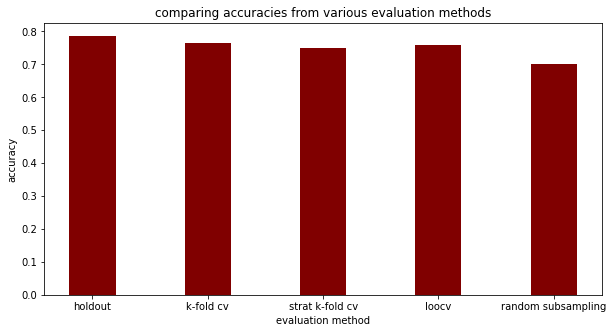

In [ ]:
fig = plt.figure(figsize = (10, 5))

plt.bar(['holdout', 'k-fold cv', 'strat k-fold cv', 'loocv', 'random subsampling'],
        [result, results_kfold.mean(), results_skfold.mean(), results_loocv.mean(), results_ransubsam.mean()],
        color ='maroon',
        width = 0.4)

plt.xlabel("evaluation method")
plt.ylabel("accuracy")
plt.title("comparing accuracies from various evaluation methods")
plt.show()